# Modelling Ulang Menggunakan Decision Tree dan SMOTE

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Data Gabungan dari Linkedin dan Jobstreet (3 Profesi).csv")
data.tail()

,job_name,company,lokasi,tingkat_job,lama_pengalaman,jenis_job,ukuran_company,industri,gaji,median_gaji,sumber
485,data engineer,michael page,dki jakarta,asosiasi,NaN,penuh waktu,>5.000 pekerja,human resources,NaN,NaN,linkedin
486,data engineer,niometrics,dki jakarta,tingkat pemula,NaN,penuh waktu,51-200 pekerja,teknologi informasi dan komunikasi,NaN,NaN,linkedin
487,data engineer,ruangguru.com,dki jakarta,asosiasi,NaN,penuh waktu,1.001-5.000 pekerja,pendidikan,NaN,NaN,linkedin
488,data engineer,matchatalent,dki jakarta,asosiasi,NaN,penuh waktu,1-50 pekerja,human resources,NaN,NaN,linkedin
489,data engineer,pt tani hub indonesia,dki jakarta,asosiasi,NaN,penuh waktu,NaN,NaN,NaN,NaN,linkedin


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_name         490 non-null    object 
 1   company          488 non-null    object 
 2   lokasi           489 non-null    object 
 3   tingkat_job      440 non-null    object 
 4   lama_pengalaman  128 non-null    float64
 5   jenis_job        472 non-null    object 
 6   ukuran_company   298 non-null    object 
 7   industri         274 non-null    object 
 8   gaji             78 non-null     object 
 9   median_gaji      78 non-null     float64
 10  sumber           490 non-null    object 
dtypes: float64(2), object(9)
memory usage: 42.2+ KB


In [4]:
def summarize_features(df):
    # first column will be data types of each feature
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    # how many missing values in each feature
    summary['Missing'] = df.isnull().sum().values
    # how many unique values in each feature (cardinality indicator)
    summary['Uniques'] = df.nunique().values

    return summary

summarize_features(data)

,index,dtypes,Missing,Uniques
0,job_name,object,0,3
1,company,object,2,342
2,lokasi,object,1,13
3,tingkat_job,object,50,6
4,lama_pengalaman,float64,362,6
5,jenis_job,object,18,4
6,ukuran_company,object,192,6
7,industri,object,216,24
8,gaji,object,412,66
9,median_gaji,float64,412,52


In [5]:
len(data)

490

In [6]:
data.drop(["company", "gaji", "sumber"], axis = 1, inplace = True)

In [7]:
data.columns

Index(['job_name', 'lokasi', 'tingkat_job', 'lama_pengalaman', 'jenis_job',
       'ukuran_company', 'industri', 'median_gaji'],
      dtype='object')

In [8]:
# subset -> Define in which columns to look for missing values

data.dropna(subset = ["median_gaji"], inplace = True)

In [9]:
data.head(2)

,job_name,lokasi,tingkat_job,lama_pengalaman,jenis_job,ukuran_company,industri,median_gaji
0,data scientist,dki jakarta,senior tingkat menengah,5.0,penuh waktu,NaN,NaN,22500000.0
6,data scientist,dki jakarta,asosiasi,2.0,penuh waktu,51-200 pekerja,konsultasi,16000000.0


In [10]:
data.reset_index(drop = True, inplace = True)

In [11]:
data.head(2)

,job_name,lokasi,tingkat_job,lama_pengalaman,jenis_job,ukuran_company,industri,median_gaji
0,data scientist,dki jakarta,senior tingkat menengah,5.0,penuh waktu,NaN,NaN,22500000.0
1,data scientist,dki jakarta,asosiasi,2.0,penuh waktu,51-200 pekerja,konsultasi,16000000.0


In [12]:
len(data)

78

In [13]:
data.groupby(["job_name"]).size()

job_name
data analyst      37
data engineer     25
data scientist    16
dtype: int64

In [14]:
summarize_features(data)

,index,dtypes,Missing,Uniques
0,job_name,object,0,3
1,lokasi,object,0,7
2,tingkat_job,object,0,4
3,lama_pengalaman,float64,47,4
4,jenis_job,object,0,3
5,ukuran_company,object,39,6
6,industri,object,45,10
7,median_gaji,float64,0,52


In [15]:
data_awal = data.copy()

In [16]:
len(data_awal) # "data_awal" yang disimpan aja, "data" dipakai di bawah2nya

78

In [17]:
data_awal.rename(columns = {"job_name": "Nama Profesi Data",
                       "lokasi": "Lokasi Perusahaan", 
                       "tingkat_job": "Tingkat Pekerjaan", 
                       "lama_pengalaman": "Lama Pengalaman",
                       "jenis_job": "Jenis Pekerjaan", 
                       "ukuran_company": "Ukuran Perusahaan", 
                       "industri": "Industri", 
                       "median_gaji": "Gaji"}, inplace=True)

In [ ]:
#!pip install dython

In [ ]:
# KORELASI
from dython import nominal
nominal.associations(data_awal, 
                     nominal_columns = ["Nama Profesi Data", "Lokasi Perusahaan", "Tingkat Pekerjaan", "Jenis Pekerjaan", "Ukuran Perusahaan", "Industri"], 
                     numerical_columns = ["Lama Pengalaman", "Gaji"],
                     figsize = (13, 12), 
                     title = "Korelasi Antar Variabel",
                     filename = "Hasil Korelasi Dython")

# Coba ambil yang korelasinya >0,25 dan yang masuk akal
# Coba variabel "jenis_job" dihapus saja

In [18]:
data.drop(["jenis_job"], axis = 1, inplace = True)

In [19]:
summarize_features(data)

,index,dtypes,Missing,Uniques
0,job_name,object,0,3
1,lokasi,object,0,7
2,tingkat_job,object,0,4
3,lama_pengalaman,float64,47,4
4,ukuran_company,object,39,6
5,industri,object,45,10
6,median_gaji,float64,0,52


# Handling Missing Value

### 1. Menangani Missing Value di "ukuran_company"

In [20]:
# Coba berdasarkan variabel -> "job_name"

import statistics

count_ukuran_company1 = data.groupby(["job_name", "ukuran_company"])["ukuran_company"].count()
mode_ukuran_company1 = data[data["ukuran_company"].notna()].groupby(["job_name"])["ukuran_company"].apply(statistics.mode)
len(mode_ukuran_company1)

3

In [21]:
count_ukuran_company1

job_name        ukuran_company     
data analyst    1-50 pekerja           6
                1.001-5.000 pekerja    3
                201-500 pekerja        5
                501-1.000 pekerja      2
                51-200 pekerja         8
                >5.000 pekerja         1
data engineer   1-50 pekerja           4
                201-500 pekerja        2
                51-200 pekerja         3
data scientist  1-50 pekerja           1
                201-500 pekerja        1
                51-200 pekerja         3
Name: ukuran_company, dtype: int64

In [22]:
mode_ukuran_company1

job_name
data analyst      51-200 pekerja
data engineer       1-50 pekerja
data scientist    51-200 pekerja
Name: ukuran_company, dtype: object

In [23]:
mode_ukuran_company1.values

array(['51-200 pekerja', '1-50 pekerja', '51-200 pekerja'], dtype=object)

In [24]:
dict_group1a = {}

for indeks in mode_ukuran_company1.index:    
    group1a = {indeks: mode_ukuran_company1[indeks]}
    
    dict_group1a.update(group1a)

In [25]:
missing_ukuran_company1 = data[pd.isna(data["ukuran_company"])]

for i in missing_ukuran_company1.index:
    for j in dict_group1a.keys():
        data_asli = (data["job_name"][i])
        
        if data_asli == j:
            data["ukuran_company"][i] = dict_group1a[j]

/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/576378443.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ukuran_company"][i] = dict_group1a[j]
/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/576378443.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ukuran_company"][i] = dict_group1a[j]
/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/576378443.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [26]:
pd.isna(data).sum()

job_name            0
lokasi              0
tingkat_job         0
lama_pengalaman    47
ukuran_company      0
industri           45
median_gaji         0
dtype: int64

### 2. Menangani Missing Value di "industri"

In [27]:
# Coba berdasarkan variabel -> "job_name"

count_industri1 = data.groupby(["job_name", "industri"])["industri"].count() # Hasilnya adalah banyaknya data yang tidak missing
mode_industri1 = data[data["industri"].notna()].groupby(["job_name"])["industri"].apply(statistics.mode) # Pakainya modus karena data kategorik
len(mode_industri1)

3

In [28]:
count_industri1

job_name        industri                          
data analyst    acara                                 1
                ekonomi                               3
                human resources                       1
                keuangan                              1
                konstruksi                            1
                konsultasi                            4
                media                                 1
                pemasaran & periklanan                2
                teknologi informasi dan komunikasi    6
                transportasi                          1
data engineer   konsultasi                            1
                teknologi informasi dan komunikasi    6
data scientist  konsultasi                            1
                teknologi informasi dan komunikasi    4
Name: industri, dtype: int64

In [29]:
mode_industri1 

# Sama semua sehingga ada yang akan diambil nilai modus kedua
# "data analyst" pakai yang industri "konsultasi"

job_name
data analyst      teknologi informasi dan komunikasi
data engineer     teknologi informasi dan komunikasi
data scientist    teknologi informasi dan komunikasi
Name: industri, dtype: object

In [30]:
# Coba impute menggunakan modus yang lain
impute_industri = {"data analyst": "konsultasi", 
                   "data engineer": "teknologi informasi dan komunikasi", 
                   "data scientist": "teknologi informasi dan komunikasi"}

missing_industri1 = data[pd.isna(data["industri"])]

for i in missing_industri1.index:
    for j in impute_industri.keys():
        data_asli = (data["job_name"][i])
        
        if data_asli == j:
            data["industri"][i] = impute_industri[j]

/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/3995431535.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["industri"][i] = impute_industri[j]
/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/3995431535.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["industri"][i] = impute_industri[j]
/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/3995431535.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [31]:
pd.isna(data).sum()

job_name            0
lokasi              0
tingkat_job         0
lama_pengalaman    47
ukuran_company      0
industri            0
median_gaji         0
dtype: int64

### 3. Menangani Missing Value di "lama_pengalaman"

In [32]:
data["lama_pengalaman"].value_counts()

lama_pengalaman
1.0    11
2.0    10
5.0     5
3.0     5
Name: count, dtype: int64

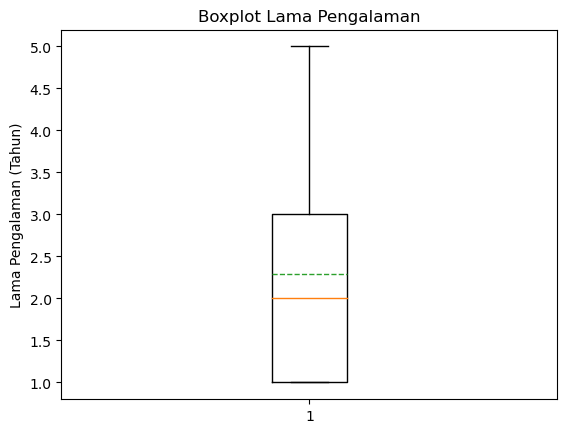

In [33]:
filtered_lama_pengalaman = data["lama_pengalaman"][~np.isnan(data["lama_pengalaman"])]

plt.boxplot(filtered_lama_pengalaman, meanline = True, showmeans = True)
plt.title("Boxplot Lama Pengalaman")
plt.ylabel("Lama Pengalaman (Tahun)")

#plt.savefig("1. Boxplot Lama Pengalaman (Untuk Handling Missing Value) REVISI.png")

plt.show()

/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/1167210052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_lama_pengalaman, hist = False, kde = True, axlabel = "Lama Pengalaman (Tahun)")


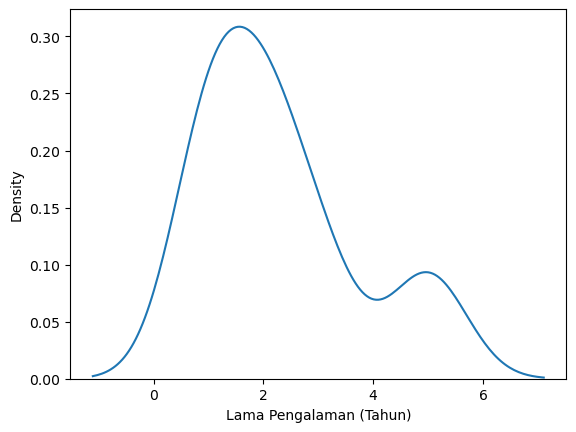

In [34]:
import seaborn as sns
sns.distplot(filtered_lama_pengalaman, hist = False, kde = True, axlabel = "Lama Pengalaman (Tahun)")

# plt.savefig("1. Distplot Lama Pengalaman (Untuk Handling Missing Value) REVISI.png")

plt.show()

# Distribusi cenderung Normal sehingga penggantinya akan menggunakan nilai mean

In [35]:
# Coba berdasarkan variabel -> "job_name"

count_lama_pengalaman1 = data.groupby(["job_name"])["lama_pengalaman"].count() # Hasilnya adalah banyaknya data yang tidak missing
mean_lama_pengalaman1 = data[data["lama_pengalaman"].notna()].groupby(["job_name"])["lama_pengalaman"].mean()

len(mean_lama_pengalaman1)

3

In [36]:
mean_lama_pengalaman1

job_name
data analyst      2.200000
data engineer     2.285714
data scientist    2.750000
Name: lama_pengalaman, dtype: float64

In [37]:
mean_lama_pengalaman1.values

array([2.2       , 2.28571429, 2.75      ])

In [38]:
dict_group4a = {}

for indeks in mean_lama_pengalaman1.index:      
    group4a = {indeks: round(mean_lama_pengalaman1[indeks], 1)}

    dict_group4a.update(group4a)

In [39]:
dict_group4a

{'data analyst': 2.2, 'data engineer': 2.3, 'data scientist': 2.8}

In [40]:
missing_lama_pengalaman1 = data[pd.isna(data["lama_pengalaman"])]

for i in missing_lama_pengalaman1.index:
    for j in dict_group4a.keys():
        data_asli = (data["job_name"][i])
        
        if data_asli == j:
            data["lama_pengalaman"][i] = dict_group4a[j]

/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/3343468947.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lama_pengalaman"][i] = dict_group4a[j]
/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/3343468947.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lama_pengalaman"][i] = dict_group4a[j]
/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/3343468947.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [41]:
pd.isna(data).sum() 

job_name           0
lokasi             0
tingkat_job        0
lama_pengalaman    0
ukuran_company     0
industri           0
median_gaji        0
dtype: int64

In [42]:
data.groupby(["job_name"]).size()

job_name
data analyst      37
data engineer     25
data scientist    16
dtype: int64

# Handling Categorical Data

In [73]:
data_oke = data.copy()
len(data_oke)

78

In [74]:
summarize_features(data_oke)

,index,dtypes,Missing,Uniques
0,job_name,object,0,3
1,lokasi,object,0,7
2,tingkat_job,object,0,4
3,lama_pengalaman,float64,0,7
4,ukuran_company,object,0,6
5,industri,object,0,10
6,median_gaji,float64,0,52


In [75]:
# NOMINAL -> "job_name", "lokasi", "industri" (pakai get_dummies)
# ORDINAL -> "tingkat_job", "ukuran_company" (pakai OrdinalEncoder)

In [76]:
# NOMINAL

# "lokasi", "industri"
nominal_cols = data_oke[["lokasi", "industri"]]
encoded_nominal = pd.get_dummies(data = nominal_cols, dtype = float)

# Gabungkan ke data asli
data_oke = pd.concat(objs = [encoded_nominal, data_oke], axis = 1)
data_oke.drop(nominal_cols, axis = 1, inplace = True)
data_oke.head(2)

,lokasi_bali,lokasi_banten,lokasi_diy,lokasi_dki jakarta,lokasi_jawa barat,lokasi_jawa timur,lokasi_kalimantan barat,industri_acara,industri_ekonomi,industri_human resources,...,industri_konsultasi,industri_media,industri_pemasaran & periklanan,industri_teknologi informasi dan komunikasi,industri_transportasi,job_name,tingkat_job,lama_pengalaman,ukuran_company,median_gaji
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,data scientist,senior tingkat menengah,5.0,51-200 pekerja,22500000.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,data scientist,asosiasi,2.0,51-200 pekerja,16000000.0


In [77]:
#!pip install category_encoders

In [78]:
print(data_oke["tingkat_job"].unique())
print()
print(data_oke["ukuran_company"].unique())

['senior tingkat menengah' 'asosiasi' 'tingkat pemula' 'magang']

['51-200 pekerja' '1-50 pekerja' '501-1.000 pekerja' '>5.000 pekerja'
 '1.001-5.000 pekerja' '201-500 pekerja']


In [79]:
# ORDINAL
import category_encoders as ce

# 1. "tingkat_job"
encoder_tingkat_job = ce.OrdinalEncoder(cols = ["tingkat_job"], return_df = True, 
                                        mapping = [{"col": "tingkat_job", 
                                                    "mapping": {"magang": 0, "tingkat pemula": 1, "asosiasi": 2, 
                                                                "senior tingkat menengah": 3, "direktur": 4, "eksekutif": 5}}])

data_oke["tingkat_job"] = encoder_tingkat_job.fit_transform(data_oke["tingkat_job"])

# 2. "ukuran_company"
encoder_ukuran_company = ce.OrdinalEncoder(cols = ["ukuran_company"], return_df = True, 
                                           mapping = [{"col": "ukuran_company", 
                                                       "mapping": {"1-50 pekerja": 0, "51-200 pekerja": 1, "201-500 pekerja": 2,
                                                                   "501-1.000 pekerja": 3, "1.001-5.000 pekerja": 4, ">5.000 pekerja": 5}}])

data_oke["ukuran_company"] = encoder_ukuran_company.fit_transform(data_oke["ukuran_company"])

In [80]:
data_oke["job_name"]

0     data scientist
1     data scientist
2     data scientist
3     data scientist
4       data analyst
           ...      
73     data engineer
74     data engineer
75     data engineer
76     data engineer
77     data engineer
Name: job_name, Length: 78, dtype: object

### COBA SMOTE PAKAI SEMUA DATA

In [81]:
# Karena mau pakai SMOTE, yang jadi y itu nama profesi data dulu
X = data_oke.drop("job_name", axis = 1)
y = data_oke["job_name"]

In [82]:
y.value_counts()

job_name
data analyst      37
data engineer     25
data scientist    16
Name: count, dtype: int64

In [83]:
# pip install -U imbalanced-learn

In [84]:
from imblearn.over_sampling import SMOTE
strategy = {"data analyst": 87, "data engineer": 87, "data scientist": 87}
oversample = SMOTE(random_state = 0, sampling_strategy = strategy)
X_smote, y_smote = oversample.fit_resample(X, y)

In [85]:
y_smote.value_counts()

job_name
data scientist    87
data analyst      87
data engineer     87
Name: count, dtype: int64

In [86]:
data_smote = pd.concat([y_smote, X_smote], axis = 1)

In [87]:
data_smote.head(2)

,job_name,lokasi_bali,lokasi_banten,lokasi_diy,lokasi_dki jakarta,lokasi_jawa barat,lokasi_jawa timur,lokasi_kalimantan barat,industri_acara,industri_ekonomi,...,industri_konstruksi,industri_konsultasi,industri_media,industri_pemasaran & periklanan,industri_teknologi informasi dan komunikasi,industri_transportasi,tingkat_job,lama_pengalaman,ukuran_company,median_gaji
0,data scientist,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3,5.0,1,22500000.0
1,data scientist,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2,2.0,1,16000000.0


In [88]:
# NOMINAL

# "job_name"
nominal_cols = data_smote[["job_name"]]
encoded_nominal = pd.get_dummies(data = nominal_cols, dtype = float)

# Gabungkan ke data asli
data_smote = pd.concat(objs = [encoded_nominal, data_smote], axis = 1)
data_smote.drop(nominal_cols, axis = 1, inplace = True)
data_smote.head(2)

,job_name_data analyst,job_name_data engineer,job_name_data scientist,lokasi_bali,lokasi_banten,lokasi_diy,lokasi_dki jakarta,lokasi_jawa barat,lokasi_jawa timur,lokasi_kalimantan barat,...,industri_konstruksi,industri_konsultasi,industri_media,industri_pemasaran & periklanan,industri_teknologi informasi dan komunikasi,industri_transportasi,tingkat_job,lama_pengalaman,ukuran_company,median_gaji
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3,5.0,1,22500000.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2,2.0,1,16000000.0


In [89]:
len(data_smote)

261

# Target Engineering

#### Target Engineering Pakai Semua Data (Seperti Saat Menggunakan Random Oversampling)

In [90]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
len(data_smote)

261

/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/3371456346.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_smote["median_gaji"], hist = False, kde = True, axlabel = "Gaji")


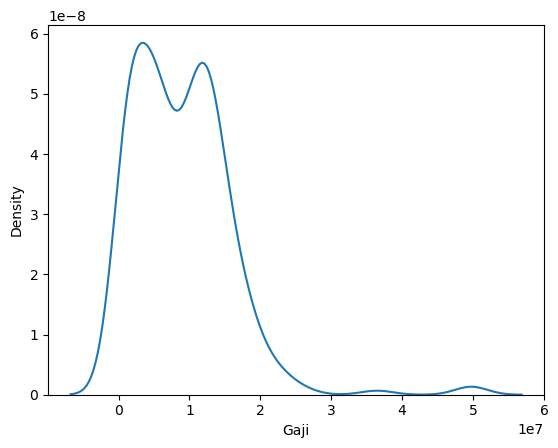

In [92]:
# Data Asli
sns.distplot(data_smote["median_gaji"], hist = False, kde = True, axlabel = "Gaji")

#plt.savefig("11. Distplot Gaji (261 Data) REVISI.png")

plt.show()

/var/folders/v5/qz8b1b916txcqz__966vn8dr0000gn/T/ipykernel_21609/1875701716.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist = False, kde = True, axlabel = "Gaji Hasil Transformasi")


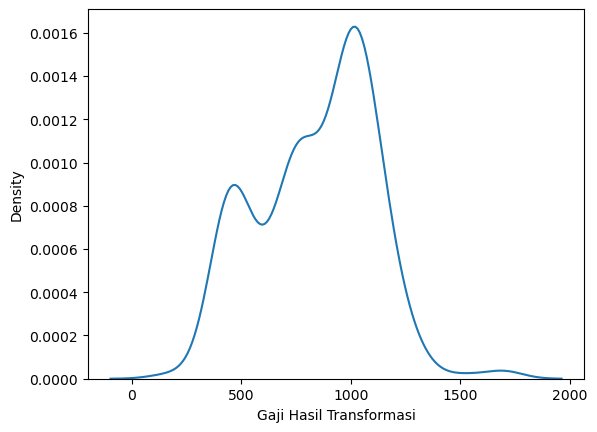

In [93]:
# Data Hasil Transformasi

#perform Box-Cox transformation on original data
transformed_data, best_lambda = stats.boxcox(data_smote["median_gaji"]) 

#plot the distribution of the transformed data values
sns.distplot(transformed_data, hist = False, kde = True, axlabel = "Gaji Hasil Transformasi")

#plt.savefig("12. Distplot Gaji Setelah Transformasi (261 Data) REVISI.png")

plt.show()

In [94]:
nilai_lambda = best_lambda
nilai_lambda

0.3624440881025335

In [95]:
print("Data Asli:", list(data_smote["median_gaji"][0:5]))
print("Data Hasil Transformasi:", transformed_data[0:5])

Data Asli: [22500000.0, 16000000.0, 10800000.0, 6000000.0, 20000000.0]
Data Hasil Transformasi: [1272.25235435 1124.04831997  974.43731023  786.93675459 1218.96786057]


In [96]:
(data_smote["median_gaji"][0:5]**nilai_lambda - 1) / nilai_lambda

0    1272.252354
1    1124.048320
2     974.437310
3     786.936755
4    1218.967861
Name: median_gaji, dtype: float64

In [97]:
# Transformasikan
data_smote["median_gaji"] = transformed_data

In [98]:
data_smote["median_gaji"][0:5]

0    1272.252354
1    1124.048320
2     974.437310
3     786.936755
4    1218.967861
Name: median_gaji, dtype: float64

In [99]:
data_smote.head(2)

,job_name_data analyst,job_name_data engineer,job_name_data scientist,lokasi_bali,lokasi_banten,lokasi_diy,lokasi_dki jakarta,lokasi_jawa barat,lokasi_jawa timur,lokasi_kalimantan barat,...,industri_konstruksi,industri_konsultasi,industri_media,industri_pemasaran & periklanan,industri_teknologi informasi dan komunikasi,industri_transportasi,tingkat_job,lama_pengalaman,ukuran_company,median_gaji
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3,5.0,1,1272.252354
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2,2.0,1,1124.048320


# K-Fold Cross Validation

In [100]:
# Kalau pakai k-fold cross validation berarti langsung pakai semua data
X = data_smote.drop("median_gaji", axis = 1)
y = data_smote["median_gaji"]

In [101]:
y.head()

0    1272.252354
1    1124.048320
2     974.437310
3     786.936755
4    1218.967861
Name: median_gaji, dtype: float64

In [102]:
X.head(2)

,job_name_data analyst,job_name_data engineer,job_name_data scientist,lokasi_bali,lokasi_banten,lokasi_diy,lokasi_dki jakarta,lokasi_jawa barat,lokasi_jawa timur,lokasi_kalimantan barat,...,industri_keuangan,industri_konstruksi,industri_konsultasi,industri_media,industri_pemasaran & periklanan,industri_teknologi informasi dan komunikasi,industri_transportasi,tingkat_job,lama_pengalaman,ukuran_company
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,5.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2.0,1


# Modelling

### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 0)

# PAKAI CROSS VAL
from sklearn.model_selection import cross_val_score
r2_tree = cross_val_score(estimator = tree, X = X, y = y, cv = 5)

In [104]:
r2_tree.mean()

0.5791693254696201

In [112]:
from sklearn.model_selection import GridSearchCV

tree_x = DecisionTreeRegressor(random_state = 0)
param_grid = {"max_depth": list(range(1, 21)), 
              "criterion": ["squared_error", "friedman_mse", "absolute_error"], 
              "max_features": ["sqrt", "log2"], 
              "min_samples_split": list(range(2, 6))}

grid_search_x = GridSearchCV(tree_x, param_grid, n_jobs = 2, verbose = 1, cv = 5)

grid_search_x.fit(X, y)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=2,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [113]:
grid_search_x.best_params_

{'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 2}

In [114]:
# Ini nilai score test (R2)-nya
grid_search_x.best_score_ # Mean cross-validated score of the best_estimator

0.6829171190426447

In [115]:
# COBA BUAT MODEL BERDASARKAN "best_params_"
tree_x1 = DecisionTreeRegressor(random_state = 0, 
                                criterion = 'squared_error',
                                max_depth = 15,
                                max_features = 'sqrt',
                                min_samples_split = 2)

In [116]:
tree_x1.fit(X, y)

DecisionTreeRegressor(max_depth=15, max_features='sqrt', random_state=0)

In [117]:
# PAKAI CROSS VAL
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

r2_tree_x1 = cross_val_score(estimator = tree_x1, X = X, y = y, cv = 5, scoring  ='r2')
nrmse_tree_x1 = cross_val_score(estimator = tree_x1, X = X, y = y, cv = 5, scoring  ='neg_root_mean_squared_error')
nmape_tree_x1 = cross_val_score(estimator = tree_x1, X = X, y = y, cv = 5, scoring  ='neg_mean_absolute_percentage_error')

r2_tree_x1 = mean(r2_tree_x1)
rmse_tree_x1 = mean(absolute(nrmse_tree_x1))
mape_tree_x1 = mean(absolute(nmape_tree_x1))

In [118]:
print("R2 TREE:", r2_tree_x1)
print("RMSE TREE:", rmse_tree_x1)
print("MAPE TREE:", mape_tree_x1)

R2 TREE: 0.6829171190426447
RMSE TREE: 144.409521250045
MAPE TREE: 0.1256892956835243


In [119]:
# grid_search ini itu sebagai modelnya
# Simpan model

import pickle
with open("model_decisiontree_smote.pkl", "wb") as f:
    pickle.dump(tree_x1, f)

#### Coba Prediksi Menggunakan Model yang Sudah Disimpan

In [120]:
# Prediksi
import pickle

with open("model_decisiontree_smote.pkl", "rb") as f:
    model = pickle.load(f)

In [121]:
kolom = ["job_name_data analyst", "job_name_data engineer", "job_name_data scientist", 
         "lokasi_bali", "lokasi_banten", "lokasi_diy", "lokasi_dki jakarta", 
         "lokasi_jawa barat", "lokasi_jawa timur", "lokasi_kalimantan barat", 
         "industri_acara", "industri_ekonomi", "industri_human resources", "industri_keuangan", 
         "industri_konstruksi", "industri_konsultasi", "industri_media", 
         "industri_pemasaran & periklanan", "industri_teknologi informasi dan komunikasi", "industri_transportasi",
         "tingkat_job", "lama_pengalaman", "ukuran_company"]

nilai = [[1, 0, 0, # "job_name" = "data analyst"
         1, 0, 0, 0, 0, 0, 0, # "lokasi" = "bali"
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, # "industri" = "acara"
         1, 0, 0]] # "tingkat_job" = "tingkat pemula", "lama_pengalaman" = 0, "ukuran_company" = "1-50 pekerja"

In [122]:
X.columns

Index(['job_name_data analyst', 'job_name_data engineer',
       'job_name_data scientist', 'lokasi_bali', 'lokasi_banten', 'lokasi_diy',
       'lokasi_dki jakarta', 'lokasi_jawa barat', 'lokasi_jawa timur',
       'lokasi_kalimantan barat', 'industri_acara', 'industri_ekonomi',
       'industri_human resources', 'industri_keuangan', 'industri_konstruksi',
       'industri_konsultasi', 'industri_media',
       'industri_pemasaran & periklanan',
       'industri_teknologi informasi dan komunikasi', 'industri_transportasi',
       'tingkat_job', 'lama_pengalaman', 'ukuran_company'],
      dtype='object')

In [123]:
import pandas as pd

coba_test = pd.DataFrame(nilai, columns = kolom)
coba_test

,job_name_data analyst,job_name_data engineer,job_name_data scientist,lokasi_bali,lokasi_banten,lokasi_diy,lokasi_dki jakarta,lokasi_jawa barat,lokasi_jawa timur,lokasi_kalimantan barat,...,industri_keuangan,industri_konstruksi,industri_konsultasi,industri_media,industri_pemasaran & periklanan,industri_teknologi informasi dan komunikasi,industri_transportasi,tingkat_job,lama_pengalaman,ukuran_company
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [124]:
# Predict-nya harus bentuk data frame (masih dalam bentuk transformasi Box-Cox)
hasil_pred = float(model.predict(coba_test))
hasil_pred

625.6206171009436

In [125]:
#nilai_lambda

In [126]:
nilai_lambda = 0.3624440881025335

In [127]:
# Kembalikan ke nilai asli
nilai_asli = round(((hasil_pred * nilai_lambda) + 1) ** (1/float(nilai_lambda)))
nilai_asli

3194110

In [ ]:
# Heroku -> https://prediksi-gaji-profesi-data.herokuapp.com/

#### Menampilkan Grafik Decision Tree

In [ ]:
model

In [ ]:
from sklearn import tree

In [ ]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(model, feature_names = X.columns, filled = True)

In [ ]:
fig.savefig("grafik decison tree (akhir) REVISI.png")

In [ ]:
text_representation = tree.export_text(model, feature_names = list(X.columns), max_depth = 3)
print(text_representation)